In [1]:
import pretty_midi

In [2]:
import numpy as np
import os

In [3]:
pm = pretty_midi.PrettyMIDI('../dataset/lmd/lmd_separated_melody_bass/A/A/A/TRAAAGR128F425B14B/1d9d16a9da90c090809c153754823c2b.mid')

In [54]:
def get_beat_time(pm, beat_division=4):
    beats = pm.get_beats()



    divided_beats = []
    for i in range(len(beats) - 1):
        for j in range(beat_division):
            divided_beats.append((beats[i + 1] - beats[i]) / beat_division * j + beats[i])
    divided_beats.append(beats[-1])

    beat_indices = []
    for beat in beats:
        beat_indices.append(np.argwhere(divided_beats == beat)[0][0])

    down_beats = pm.get_downbeats()
    down_beat_indices = []
    for down_beat in down_beats:
        down_beat_indices.append(np.argwhere(divided_beats == down_beat)[0][0])

    return np.array(divided_beats),np.array(beats),np.array(down_beats),beat_indices,down_beat_indices



In [55]:
def walk(folder_name):
    files = []
    for p, d, f in os.walk(folder_name):
        for file in f:
            endname = file.split('.')[-1].lower()
            if endname == 'mid' or endname == 'midi':
                files.append(os.path.join(p,file))
    return files

In [56]:
file_names = walk('../dataset/lmd/lmd_separated_melody_bass/')

In [61]:
len(file_names)

57030

In [91]:
pm.time_signature_changes

[TimeSignature(numerator=6, denominator=8, time=0.0)]

In [143]:
signatures = {}

In [129]:
tempos = {}

In [144]:

for file_name in file_names:
    pm = pretty_midi.PrettyMIDI(file_name)
    
#     tempo_change_times, tempi = pm.get_tempo_changes()
    
#     tempos[file_name] = len(tempi)
    
    
    
    
    pm.time_signature_changes.sort(key=lambda ts: ts.time)
    new_changes = []
    previous = None
    for changes in pm.time_signature_changes:
        if previous is None:
            previous = changes
            new_changes.append(changes)
        else:
            if changes.numerator != previous.numerator or changes.denominator != previous.denominator:
                previous = changes
                new_changes.append(changes)
                
    pm.time_signature_changes = new_changes
    
    
    signatures[file_name] = pm.time_signature_changes
#     if len(signatures[file_name]) > 1:
#         print(file_name)
#         break

KeyboardInterrupt: 

In [149]:
signature_change_time = list(map(len,list(signatures.values())))

In [150]:
signature_change_time

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [152]:
counted_signature = Counter(signature_change_time)

In [153]:
counted_signature.most_common(10)

[(1, 2638),
 (3, 113),
 (2, 47),
 (7, 42),
 (5, 36),
 (4, 16),
 (11, 11),
 (15, 8),
 (13, 5),
 (6, 2)]

In [127]:
pm.get_tempo_changes()

(array([0.00000000e+00, 2.50000000e-02, 1.83720606e+02, 1.83763710e+02,
        1.83807188e+02, 1.83851048e+02, 1.83895295e+02, 1.83939938e+02,
        1.83984983e+02, 1.84030438e+02, 1.84076309e+02, 1.84122606e+02,
        1.84169335e+02, 1.84216504e+02, 1.84264123e+02, 1.84292970e+02,
        1.84341513e+02, 1.84390533e+02, 1.84440038e+02, 1.84490038e+02,
        1.84540543e+02, 1.84591563e+02, 1.84643110e+02, 1.84695193e+02,
        1.84747825e+02, 1.84801016e+02, 1.84854779e+02, 1.84892823e+02,
        1.84947768e+02, 1.85003324e+02, 1.85059503e+02, 1.85116321e+02,
        1.85173793e+02, 1.85231932e+02, 1.85290756e+02, 1.85350279e+02,
        1.85410520e+02, 1.85471496e+02, 1.85533224e+02, 1.85576974e+02,
        1.85640265e+02, 1.85704368e+02, 1.85769303e+02, 1.85835092e+02,
        1.85901759e+02, 1.85969327e+02, 1.86037820e+02, 1.86107264e+02,
        1.86177687e+02, 1.86249115e+02, 1.86321579e+02, 1.89850987e+02,
        2.42024887e+02]),
 array([100.        , 115.00002875, 11

In [123]:
pm.get_tempo_changes()

[array([0.]), array([104.99992125])]

In [114]:
pm.time_signature_changes.sort(key=lambda ts: ts.time)

In [120]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0),
 TimeSignature(numerator=3, denominator=4, time=11.42858),
 TimeSignature(numerator=4, denominator=4, time=13.142867)]

In [117]:
pm.time_signature_changes.sort(key=lambda ts: ts.time)
new_changes = []
previous = None
for changes in pm.time_signature_changes:
    if previous is None:
        previous = changes
        new_changes.append(changes)
    else:
        if changes.numerator != previous.numerator or changes.denominator != previous.denominator:
            previous = changes
            new_changes.append(changes)
            

In [118]:
new_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [113]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0),
 TimeSignature(numerator=4, denominator=4, time=2.0)]

In [112]:
signatures[file_name]

[TimeSignature(numerator=4, denominator=4, time=0.0),
 TimeSignature(numerator=4, denominator=4, time=2.0)]

In [84]:
pm = pretty_midi.PrettyMIDI('../dataset/lmd/lmd_separated_melody_bass/A/A/O/TRAAOPV128F92F7CE9/02264fee9c66cda1a2b783a2fa85fdad.mid')

In [88]:
beats = pm.get_beats()

In [89]:
beats

array([  0.        ,   0.315789  ,   0.631578  ,   0.947367  ,
         1.263156  ,   1.578945  ,   1.894734  ,   2.210523  ,
         2.526312  ,   2.842101  ,   3.15789   ,   3.473679  ,
         3.789468  ,   4.105257  ,   4.421046  ,   4.736835  ,
         5.052624  ,   5.368413  ,   5.684202  ,   5.999991  ,
         6.31578   ,   6.631569  ,   6.947358  ,   7.263147  ,
         7.578936  ,   7.894725  ,   8.210514  ,   8.526303  ,
         8.842092  ,   9.157881  ,   9.47367   ,   9.789459  ,
        10.105248  ,  10.421037  ,  10.736826  ,  11.052615  ,
        11.368404  ,  11.684193  ,  11.999982  ,  12.315771  ,
        12.63156   ,  12.947349  ,  13.263138  ,  13.578927  ,
        13.894716  ,  14.210505  ,  14.526294  ,  14.842083  ,
        15.157872  ,  15.473661  ,  15.78945   ,  16.105239  ,
        16.421028  ,  16.736817  ,  17.052606  ,  17.368395  ,
        17.684184  ,  17.999973  ,  18.315762  ,  18.631551  ,
        18.94734   ,  19.263129  ,  19.578918  ,  19.89

In [77]:
pm_6_8 = pretty_midi.PrettyMIDI('../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/01b5b401a98fa77f45b25063c7cdaeb3.mid')

In [79]:
pm_6_8.get_downbeats()

array([  0.      ,   1.999998,   7.999992,  13.999986,  19.99998 ,
        25.999974,  31.999968,  37.999962,  43.999956,  49.99995 ,
        55.999944,  61.999938,  67.999932,  73.999926,  79.99992 ,
        85.999914,  91.999908,  97.999902, 103.999896, 109.99989 ,
       115.999884, 121.999878, 127.999872, 133.999866, 139.99986 ,
       145.999854, 151.999848, 157.999842, 163.999836, 169.99983 ,
       175.999824, 181.999818, 187.999812, 193.999806])

In [80]:
pm_6_8.get_beats()

array([  0.       ,   0.999999 ,   1.999998 ,   2.999997 ,   3.999996 ,
         4.999995 ,   5.999994 ,   6.999993 ,   7.999992 ,   8.999991 ,
         9.99999  ,  10.999989 ,  11.999988 ,  12.999987 ,  13.999986 ,
        14.999985 ,  15.999984 ,  16.999983 ,  17.999982 ,  18.999981 ,
        19.99998  ,  20.999979 ,  21.999978 ,  22.999977 ,  23.999976 ,
        24.999975 ,  25.999974 ,  26.999973 ,  27.999972 ,  28.999971 ,
        29.99997  ,  30.999969 ,  31.999968 ,  32.999967 ,  33.999966 ,
        34.999965 ,  35.999964 ,  36.999963 ,  37.999962 ,  38.999961 ,
        39.99996  ,  40.999959 ,  41.999958 ,  42.999957 ,  43.999956 ,
        44.999955 ,  45.999954 ,  46.999953 ,  47.999952 ,  48.999951 ,
        49.99995  ,  50.999949 ,  51.999948 ,  52.999947 ,  53.999946 ,
        54.999945 ,  55.999944 ,  56.999943 ,  57.999942 ,  58.999941 ,
        59.99994  ,  60.999939 ,  61.999938 ,  62.999937 ,  63.999936 ,
        64.999935 ,  65.999934 ,  66.999933 ,  67.999932 ,  68.9

In [57]:
pm_4_6 = pretty_midi.PrettyMIDI('../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/b66cea86a1719b4ca78650a9ac7e61b7.mid')

In [59]:
pm_4_6.get_downbeats()

array([  0.       ,   3.999996 ,   7.999992 ,  11.999988 ,  15.999984 ,
        19.99998  ,  23.999976 ,  27.999972 ,  31.999968 ,  35.999964 ,
        39.99996  ,  43.999956 ,  47.999952 ,  51.999948 ,  55.999944 ,
        59.99994  ,  63.999936 ,  67.999932 ,  71.999928 ,  75.999924 ,
        79.99992  ,  83.999916 ,  87.999912 ,  91.999908 ,  95.999904 ,
        99.9999   , 103.999896 , 107.999892 , 111.999888 , 115.999884 ,
       119.99988  , 123.999876 , 127.999872 , 131.999868 , 135.999864 ,
       139.99986  , 143.999856 , 147.999852 , 151.999848 , 155.999844 ,
       159.99984  , 163.999836 , 167.999832 , 171.999828 , 175.999824 ,
       179.99982  , 183.999816 , 187.999812 , 191.999808 , 196.0183445])

In [58]:
pm_4_6.get_beats()

array([  0.       ,   0.666666 ,   1.333332 ,   1.999998 ,   2.666664 ,
         3.33333  ,   3.999996 ,   4.666662 ,   5.333328 ,   5.999994 ,
         6.66666  ,   7.333326 ,   7.999992 ,   8.666658 ,   9.333324 ,
         9.99999  ,  10.666656 ,  11.333322 ,  11.999988 ,  12.666654 ,
        13.33332  ,  13.999986 ,  14.666652 ,  15.333318 ,  15.999984 ,
        16.66665  ,  17.333316 ,  17.999982 ,  18.666648 ,  19.333314 ,
        19.99998  ,  20.666646 ,  21.333312 ,  21.999978 ,  22.666644 ,
        23.33331  ,  23.999976 ,  24.666642 ,  25.333308 ,  25.999974 ,
        26.66664  ,  27.333306 ,  27.999972 ,  28.666638 ,  29.333304 ,
        29.99997  ,  30.666636 ,  31.333302 ,  31.999968 ,  32.666634 ,
        33.3333   ,  33.999966 ,  34.666632 ,  35.333298 ,  35.999964 ,
        36.66663  ,  37.333296 ,  37.999962 ,  38.666628 ,  39.333294 ,
        39.99996  ,  40.666626 ,  41.333292 ,  41.999958 ,  42.666624 ,
        43.33329  ,  43.999956 ,  44.666622 ,  45.333288 ,  45.9

In [93]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [141]:
sig_values = signatures.values()

In [65]:
sig_values = signatures.values()

In [66]:
sig_values = list(sig_values)

In [67]:
###### sig_values[0]

In [68]:
counter = []

In [69]:
for value in sig_values:
    for item in value:
        counter.append((item.numerator,item.denominator,))

In [131]:
from collections import Counter

In [139]:
counte_tempo = Counter(tempos.values())

In [ ]:
counted_signature_changes_time = 

In [72]:
counted.most_common(7)

[((4, 4), 1161),
 ((2, 4), 181),
 ((3, 4), 47),
 ((6, 8), 28),
 ((5, 4), 10),
 ((3, 8), 9),
 ((12, 8), 9)]

In [75]:
for key,value in signatures.items():
    for item in value:
        if (item.numerator,item.denominator) == (6, 8):
            print(key)

../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/01b5b401a98fa77f45b25063c7cdaeb3.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/01b5b401a98fa77f45b25063c7cdaeb3.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/275833bbe414a6bd9f6de29718bcd4bc.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/6a3b7769dd8e430c17b5d0096dd0b0e1.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/9e93e6a2f4c25f7fa60c85dca81fe831.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/c76c7e09f6577f3d3453f32df3befdd8.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/e2812ec41a07bd0705cf16a9627d92a3.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/e2812ec41a07bd0705cf16a9627d92a3.mid
../dataset/lmd/lmd_separated_melody_bass/A/B/B/TRABBNH128F93392A1/ffca224a4bda3aac5d5d72e90d08bac9.mid
../dataset/lmd/lmd_separated_melody_bass/A/C/B/TRACBNP128F4278243/9228469

In [74]:
for value in sig_values:
    value

In [136]:
pm = pretty_midi.PrettyMIDI(file_names[0])

In [137]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [138]:
pm.instruments

[Instrument(program=1, is_drum=False, name="voice               "),
 Instrument(program=33, is_drum=False, name="main bass           "),
 Instrument(program=48, is_drum=False, name="main strings m      "),
 Instrument(program=0, is_drum=True, name="drums + fills       ")]

In [4]:
beats = pm.get_beats()

In [32]:
beats[:10]

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [5]:
down_beats = pm.get_downbeats()

In [33]:
down_beats[:10]

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [37]:
down_beat_to_beat_indices = []
for down_beat in down_beats:
    down_beat_to_beat_indices.append(np.argmin(np.abs(beats - down_beat)))


In [38]:
down_beat_to_beat_indices

[0,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 40,
 44,
 48,
 52,
 56,
 60,
 64,
 68,
 72,
 76,
 80,
 84,
 88,
 92,
 96,
 100,
 104,
 108,
 112,
 116,
 120,
 124,
 128,
 132,
 136,
 140,
 144,
 148,
 152,
 156,
 160,
 164,
 168,
 172,
 176,
 180,
 184,
 188,
 192,
 196,
 200,
 204,
 208,
 212,
 216,
 220,
 224,
 228,
 232,
 236,
 240,
 244,
 248,
 252,
 256,
 260,
 264,
 268,
 272,
 276,
 280,
 284,
 288,
 292,
 296,
 300,
 304,
 308,
 312,
 316,
 320,
 324,
 328,
 332,
 336,
 340,
 344,
 348,
 352,
 356,
 360,
 364,
 368,
 372,
 376,
 380,
 384,
 388,
 392,
 396,
 400,
 404,
 408,
 412,
 416,
 420,
 424,
 428,
 432]

In [7]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [30]:
signatures = [(signature.numerator,signature.denominator) for signature in pm.time_signature_changes]

In [31]:
signatures

[(4, 4)]

In [17]:
signature_change_time = np.array([signature.time for signature in pm.time_signature_changes])

In [90]:
pm.time_signature_changes

[TimeSignature(numerator=4, denominator=4, time=0.0)]

In [18]:
signature_change_time

array([0.])

In [23]:
signature_change_bars =np.argmin(np.abs(signature_change_time - down_beats))

In [24]:
signature_change_bars

0

In [89]:
 pm.get_tempo_changes()

(array([0.]), array([120.]))

In [82]:
tempo_change_time = pm.get_tempo_changes()[0]

In [84]:
tempo_change_time[0]

0.0

In [85]:
tempo_change_bars =[np.argmin(np.abs(time_change_time - down_beats))]

In [92]:
beats

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [94]:


for bar,bar_time in enumerate(down_beats):
    if bar in time_change_bars:
        duration_dict = {}
        signature_change_bar_pos = np.argwhere(bar == signature_change_bars)[0][0]
        curr_time_signature = signatures[signature_change_bar_pos]
        beat_position = down_beat_to_beat_indices[bar]
        beat_duration = beats[beat_position+1] - beats[beat_position]
        
        if curr_time_signature[1] == 4:
            # 4/4, 2/4, 3/4, 5/4
            quarter_note_duration = beat_duration
            half_note_duration = quarter_note_duration * 2
            eighth_note_duration = quarter_note_duration / 2
            sixteenth_note_duration = quarter_note_duration / 4
            quarter_triplets_duration = half_note_duration / 3
            eighth_triplets_duration = quarter_note_duration / 3
            sixteenth_triplets_duration = eighth_note_duration / 3
            if curr_time_signature[0] >= 4:
                whole_note_duration = 4*quarter_note_duration
            
            
                
            
        else:
            # 6/8, 12/8
           
            quarter_note_duration = beat_duration / 3 * 2
            half_note_duration = quarter_note_duration * 2
            eighth_note_duration = quarter_note_duration / 2
            sixteenth_note_duration = quarter_note_duration / 4
            quarter_triplets_duration = half_note_duration / 3
            eighth_triplets_duration = quarter_note_duration / 3
            sixteenth_triplets_duration = eighth_note_duration / 3
            
        duration_dict['quarter'] = quarter_note_duration
        duration_dict['half'] = half_note_duration
        duration_dict['eighth'] = eighth_note_duration
        duration_dict['sixteenth'] = sixteenth_note_duration
        duration_dict['quarter_triplets'] = quarter_triplets_duration
        duration_dict['eighth_triplets'] = eighth_triplets_duration
        duration_dict['sixteenth_triplets'] = sixteenth_triplets_duration
        if curr_time_signature[0] >= 4:
            duration_dict['whole'] = whole_note_duration
            

KeyError: 0

In [52]:
half_note_duration

1.0

In [53]:
beat_duration

0.5

In [98]:
pm.get_tempo_changes()

(array([0.]), array([120.]))

In [99]:
pm1 = pretty_midi.PrettyMIDI(initial_tempo=120)

In [101]:
pm1.time_signature_changes = pm.time_signature_changes

In [106]:
inst = pretty_midi.Instrument(program=42, is_drum=False, name='my cello')

In [107]:
inst.notes = pm.instruments[0].notes

In [108]:
pm1.instruments.append(inst)

In [109]:
pm1.get_beats()

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [105]:
pm1.instruments[0].notes = pm0.instruments[0]

[Note(start=29.166667, end=29.466667, pitch=69, velocity=100),
 Note(start=29.583333, end=29.850000, pitch=72, velocity=100),
 Note(start=30.000000, end=30.266667, pitch=72, velocity=100),
 Note(start=30.416667, end=30.616667, pitch=71, velocity=100),
 Note(start=30.833333, end=31.550000, pitch=69, velocity=100),
 Note(start=31.666667, end=31.783333, pitch=72, velocity=100),
 Note(start=31.883333, end=32.183333, pitch=72, velocity=100),
 Note(start=32.300000, end=32.433333, pitch=69, velocity=100),
 Note(start=32.500000, end=33.600000, pitch=79, velocity=100),
 Note(start=33.750000, end=33.983333, pitch=77, velocity=100),
 Note(start=34.166667, end=35.516667, pitch=77, velocity=100),
 Note(start=36.250000, end=36.500000, pitch=79, velocity=100),
 Note(start=36.666667, end=36.933333, pitch=79, velocity=100),
 Note(start=37.083333, end=37.350000, pitch=77, velocity=100),
 Note(start=37.500000, end=38.583333, pitch=74, velocity=100),
 Note(start=38.750000, end=39.016667, pitch=76, velocit

In [3]:
from music21 import *

In [136]:
s = converter.parse('../dataset/lmd/lmd_separated_melody_bass/A/A/A/TRAAAZF12903CCCF6B/6304d2bba4282f8bd74322828c30f0c7.mid')

In [103]:
s2.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.key.Key of D- major>
    {0.0} <music21.meter.TimeSignature 6/8>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.note.Rest rest>
    {0.0} <music21.stream.Voice 1>

{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.meter.TimeSignature 6/8>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.chord.Chord F5 G#5 C#6>
    {0.0} <music21.stream.Voice 1>

{6.0} <music21.stream.Measure 3 offset=6.0>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.chord.Chord E-5 G#5 C6>
    {0.0} <music21.stream.Voice 1>

{9.0} <music21.stream.Measure 4 offset=9.0>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.chord.Chord F5 B-5 C#6>
    {0.0} <music21.stream.Voice 1>

{12.0} <music21.stream.Measure 5 offset=12.0>
    {0.0} <music21.stream.Voice 0>
        {0.0} <music21.chord.Chord F5 G#5 C6>
    {0.0} <music21.stream.Voice 1>

{15.0} <music21.stream.Measure 6 

In [137]:
s0 = s.parts[0].makeMeasures()

In [147]:
s0_quantised = s0.quantize(processOffsets=(4,6))

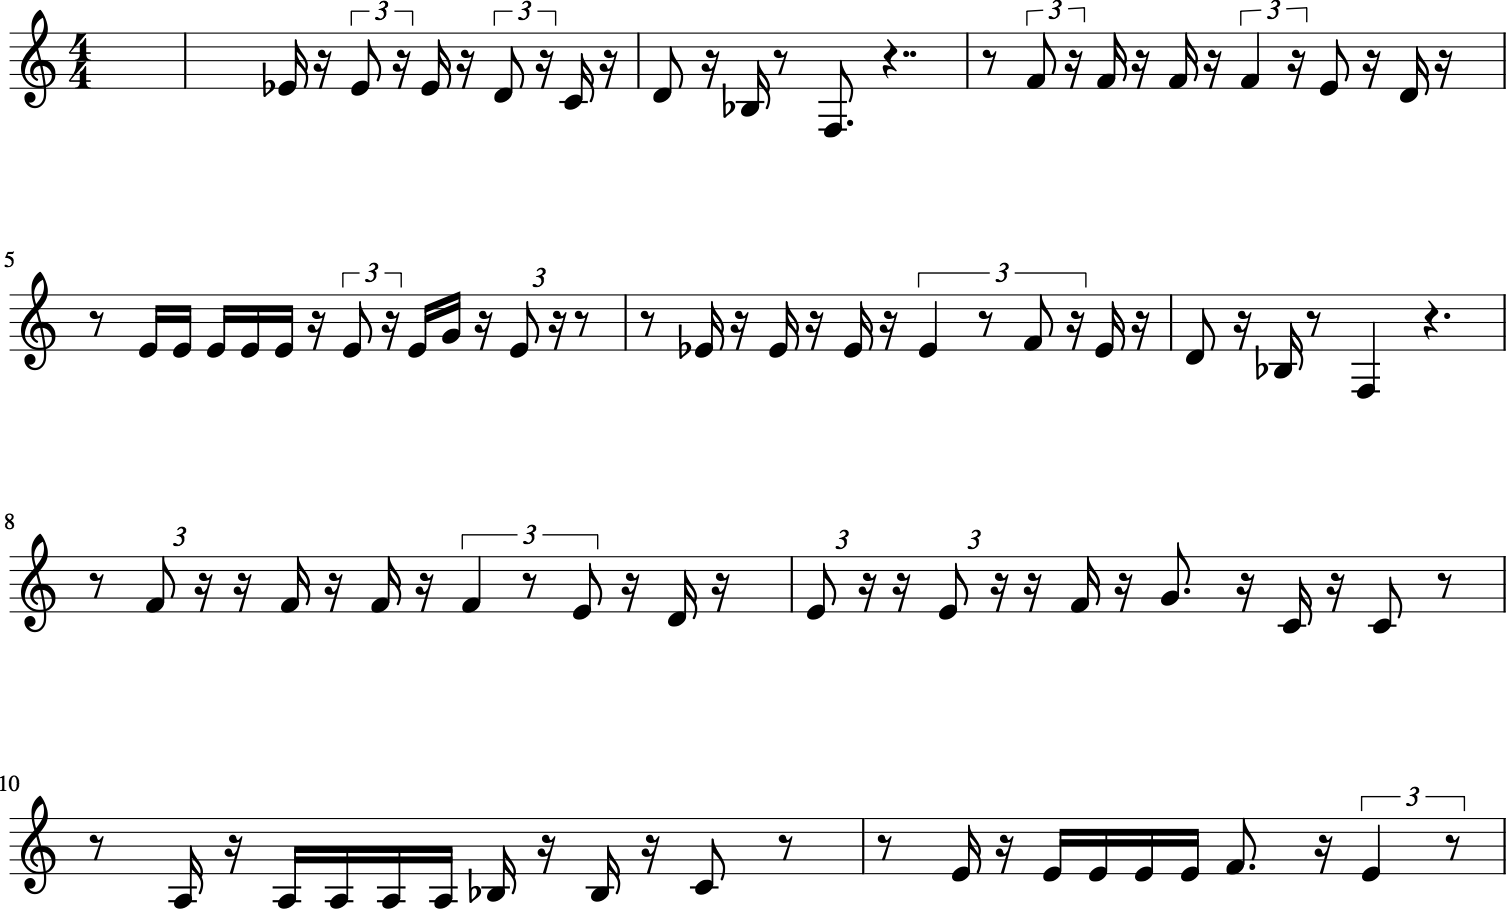

In [148]:
s0_quantised.measures(10,20).show()

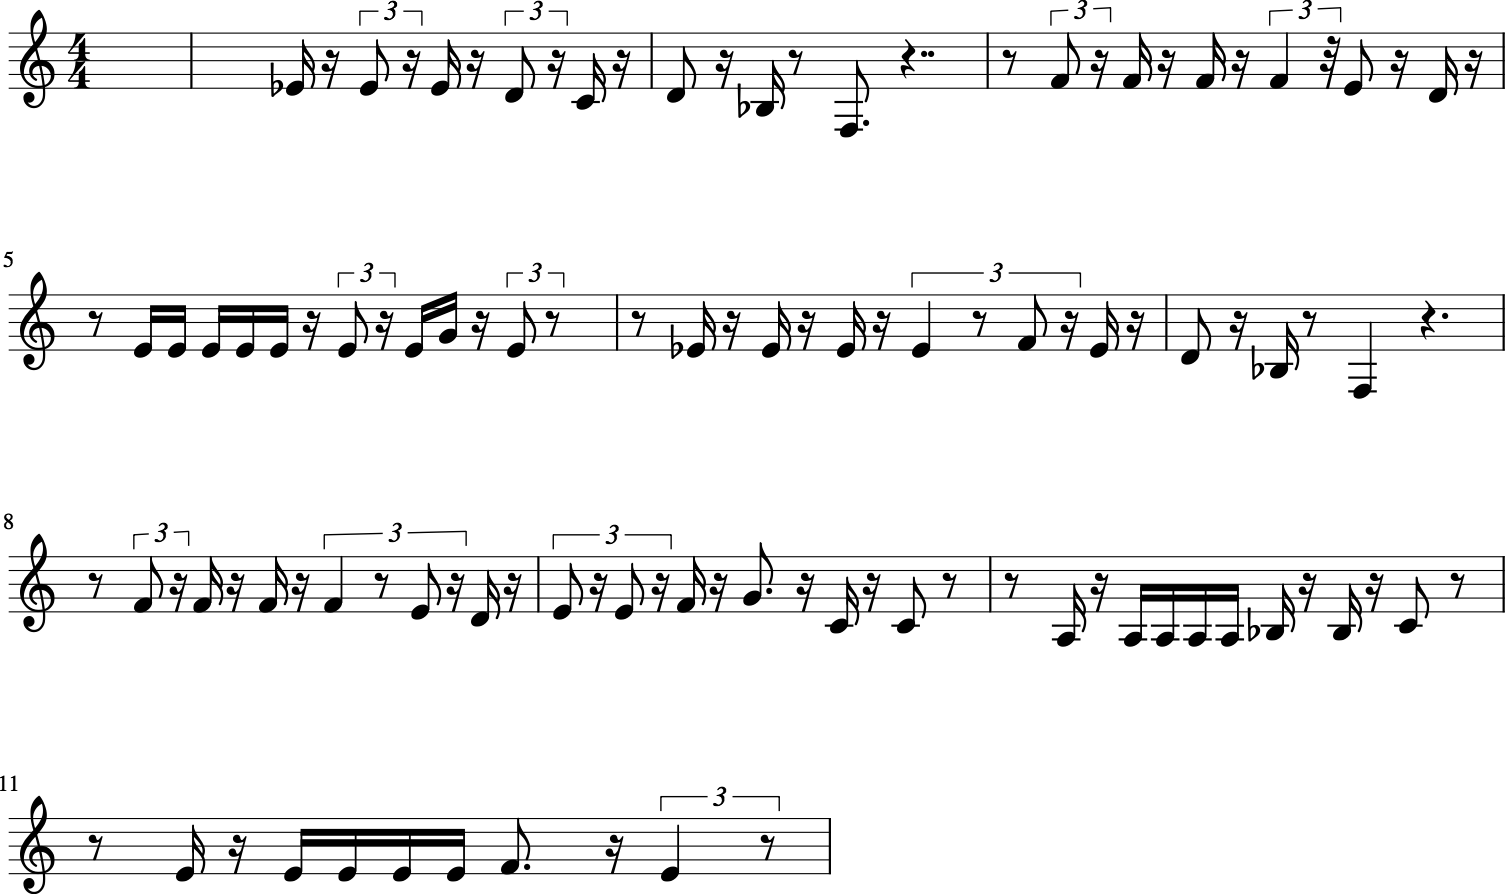

In [141]:
s0.measures(10,20).show()

In [149]:
for elem in s0_quantised.measures(10,15).recurse():
    if isinstance(elem, stream.Voice):
        continue
    if isinstance(elem, note.Note):
        print(elem.offset,elem.pitch,elem.duration.fullName)
    elif isinstance(elem, note.Rest):
        print(elem.offset,elem.duration.fullName,elem)
    elif isinstance(elem, chord.Chord):
        print(elem.offset,elem.pitches,elem.duration.fullName)
    
    else:
        print(elem.offset, elem,elem.classes[0])

0.0 Tenor Saxophone TenorSaxophone
0.0 <music21.clef.TrebleClef> TrebleClef
0.0 <music21.meter.TimeSignature 4/4> TimeSignature
0.0 <music21.stream.Measure 10 offset=0.0> Measure
4.0 <music21.stream.Measure 11 offset=4.0> Measure
1.5 E-4 16th
1.75 16th <music21.note.Rest rest>
2.0 E-4 Eighth Triplet (1/3 QL)
7/3 16th Triplet (1/6 QL) <music21.note.Rest rest>
2.5 E-4 16th
2.75 16th <music21.note.Rest rest>
3.0 D4 Eighth Triplet (1/3 QL)
10/3 16th Triplet (1/6 QL) <music21.note.Rest rest>
3.5 C4 16th
3.75 16th <music21.note.Rest rest>
8.0 <music21.stream.Measure 12 offset=8.0> Measure
0.0 D4 Eighth
0.5 16th <music21.note.Rest rest>
0.75 B-3 16th
1.0 Eighth <music21.note.Rest rest>
1.5 F3 Dotted Eighth
2.25 Half tied to 16th (2 1/4 total QL) <music21.note.Rest rest>
12.0 <music21.stream.Measure 13 offset=12.0> Measure
0.5 F4 Eighth Triplet (1/3 QL)
0.75 16th Triplet (1/6 QL) <music21.note.Rest rest>
1.0 F4 16th
1.25 16th <music21.note.Rest rest>
1.5 F4 16th
1.75 16th <music21.note.Rest re

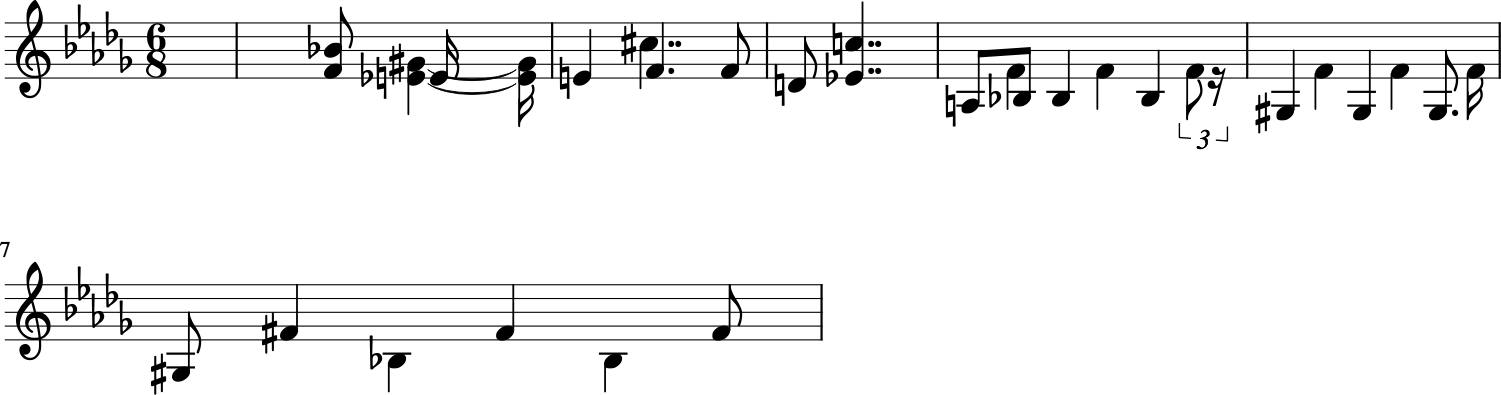

In [134]:
s3.measures(24,30).show()

In [135]:
for elem in s3.measures(24,30).recurse():
    if isinstance(elem, stream.Voice):
        continue
    if isinstance(elem, note.Note):
        print(elem.offset,elem.pitch,elem.duration.fullName)
    elif isinstance(elem, note.Rest):
        print(elem.offset,elem.duration.fullName,elem)
    elif isinstance(elem, chord.Chord):
        print(elem.offset,elem.pitches,elem.duration.fullName)
    
    else:
        print(elem.offset, elem,elem.classes[0])

0.0 Electric Guitar ElectricGuitar
0.0 <music21.clef.TrebleClef> TrebleClef
0.0 D- major Key
0.0 <music21.meter.TimeSignature 6/8> TimeSignature
0.0 <music21.stream.Measure 24 offset=0.0> Measure
3.0 <music21.stream.Measure 25 offset=3.0> Measure
1.0 (<music21.pitch.Pitch F4>, <music21.pitch.Pitch B-4>) Eighth
1.5 E4 16th
1.5 (<music21.pitch.Pitch G#4>, <music21.pitch.Pitch E-4>) Quarter tied to 16th (1 1/4 total QL)
6.0 <music21.stream.Measure 26 offset=6.0> Measure
0.0 E4 Quarter
1.0 F4 Dotted Quarter
2.5 F4 Eighth
1.0 C#5 Double Dotted Quarter
9.0 <music21.stream.Measure 27 offset=9.0> Measure
0.0 D4 Eighth
0.5 (<music21.pitch.Pitch E-4>, <music21.pitch.Pitch C5>) Double Dotted Quarter
12.0 <music21.stream.Measure 28 offset=12.0> Measure
0.0 A3 Eighth
0.5 B-3 Eighth
1.0 B-3 Quarter
2.0 B-3 Quarter
0.5 F4 Quarter
1.5 F4 Quarter
2.5 F4 Eighth Triplet (1/3 QL)
15.0 <music21.stream.Measure 29 offset=15.0> Measure
0.0 G#3 Quarter
1.0 G#3 Quarter
2.0 G#3 Dotted Eighth
0.5 F4 Quarter
1.5 F

In [74]:
s1 = s.makeMeasures()

In [53]:
s1.getElementsByClass('Measure')

<music21.stream.iterator.StreamIterator for Score:0x11ce321d0 @:0>

In [73]:
s.show('text')

{0.0} <music21.stream.Part 0x11dc1a080>
    {0.0} <music21.instrument.Flute 'Flute'>
    {0.0} <music21.instrument.Instrument ''>
    {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
    {0.0} <music21.key.Key of D- major>
    {0.0} <music21.meter.TimeSignature 6/8>
    {0.25} <music21.note.Rest rest>
    {3.0} <music21.meter.TimeSignature 6/8>
    {26.0} <music21.note.Note B->
    {26.5} <music21.note.Note B->
    {26.8333} <music21.note.Rest rest>
    {27.0} <music21.note.Note B->
    {28.0} <music21.note.Note G#>
    {28.75} <music21.note.Rest rest>
    {29.0} <music21.note.Note G#>
    {29.5} <music21.note.Note F>
    {30.0} <music21.note.Note G#>
    {30.75} <music21.note.Rest rest>
    {31.0} <music21.note.Note G#>
    {31.75} <music21.note.Note B->
    {32.4167} <music21.note.Rest rest>
    {34.5} <music21.note.Note F>
    {35.0} <music21.note.Note E->
    {35.25} <music21.note.Rest rest>
    {35.3333} <music21.note.Note C#>
    {35.6667} <music21.note.Rest rest>
    {3

In [72]:
s.measure(1).show('text')

{0.0} <music21.stream.Part 0x11ba60eb8>
    {0.0} <music21.instrument.Flute 'Flute'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of D- major>
        {0.0} <music21.meter.TimeSignature 6/8>
        {0.0} <music21.stream.Voice 0>
            {0.0} <music21.note.Rest rest>
        {0.0} <music21.stream.Voice 1>

{0.0} <music21.stream.Part 0x11dc1c4e0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.instrument.FretlessBass 'Fretless Bass'>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.key.Key of D- major>
        {0.0} <music21.meter.TimeSignature 6/8>
        {0.25} <music21.note.Rest rest>
{0.0} <music21.stream.Part 0x11de79828>
    {0.0} <music21.instrument.ElectricOrgan 'Electric Organ'>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of D- major>
        {0.0} <music21.meter.TimeSignature 6/8>
        {

In [61]:
s1.getElementsByClass('Measure')

99

In [59]:
for elem in s1.measures(1,10).recurse():
    if isinstance(elem, note.Note):
        print(elem.offset,elem.pitch,elem.duration.fullName)
    elif isinstance(elem, note.Rest):
        print(elem.offset,elem.duration.fullName,elem)
    else:
        print(elem.offset, elem,elem.classes[0])

In [11]:
s.parts[0].show('midi')

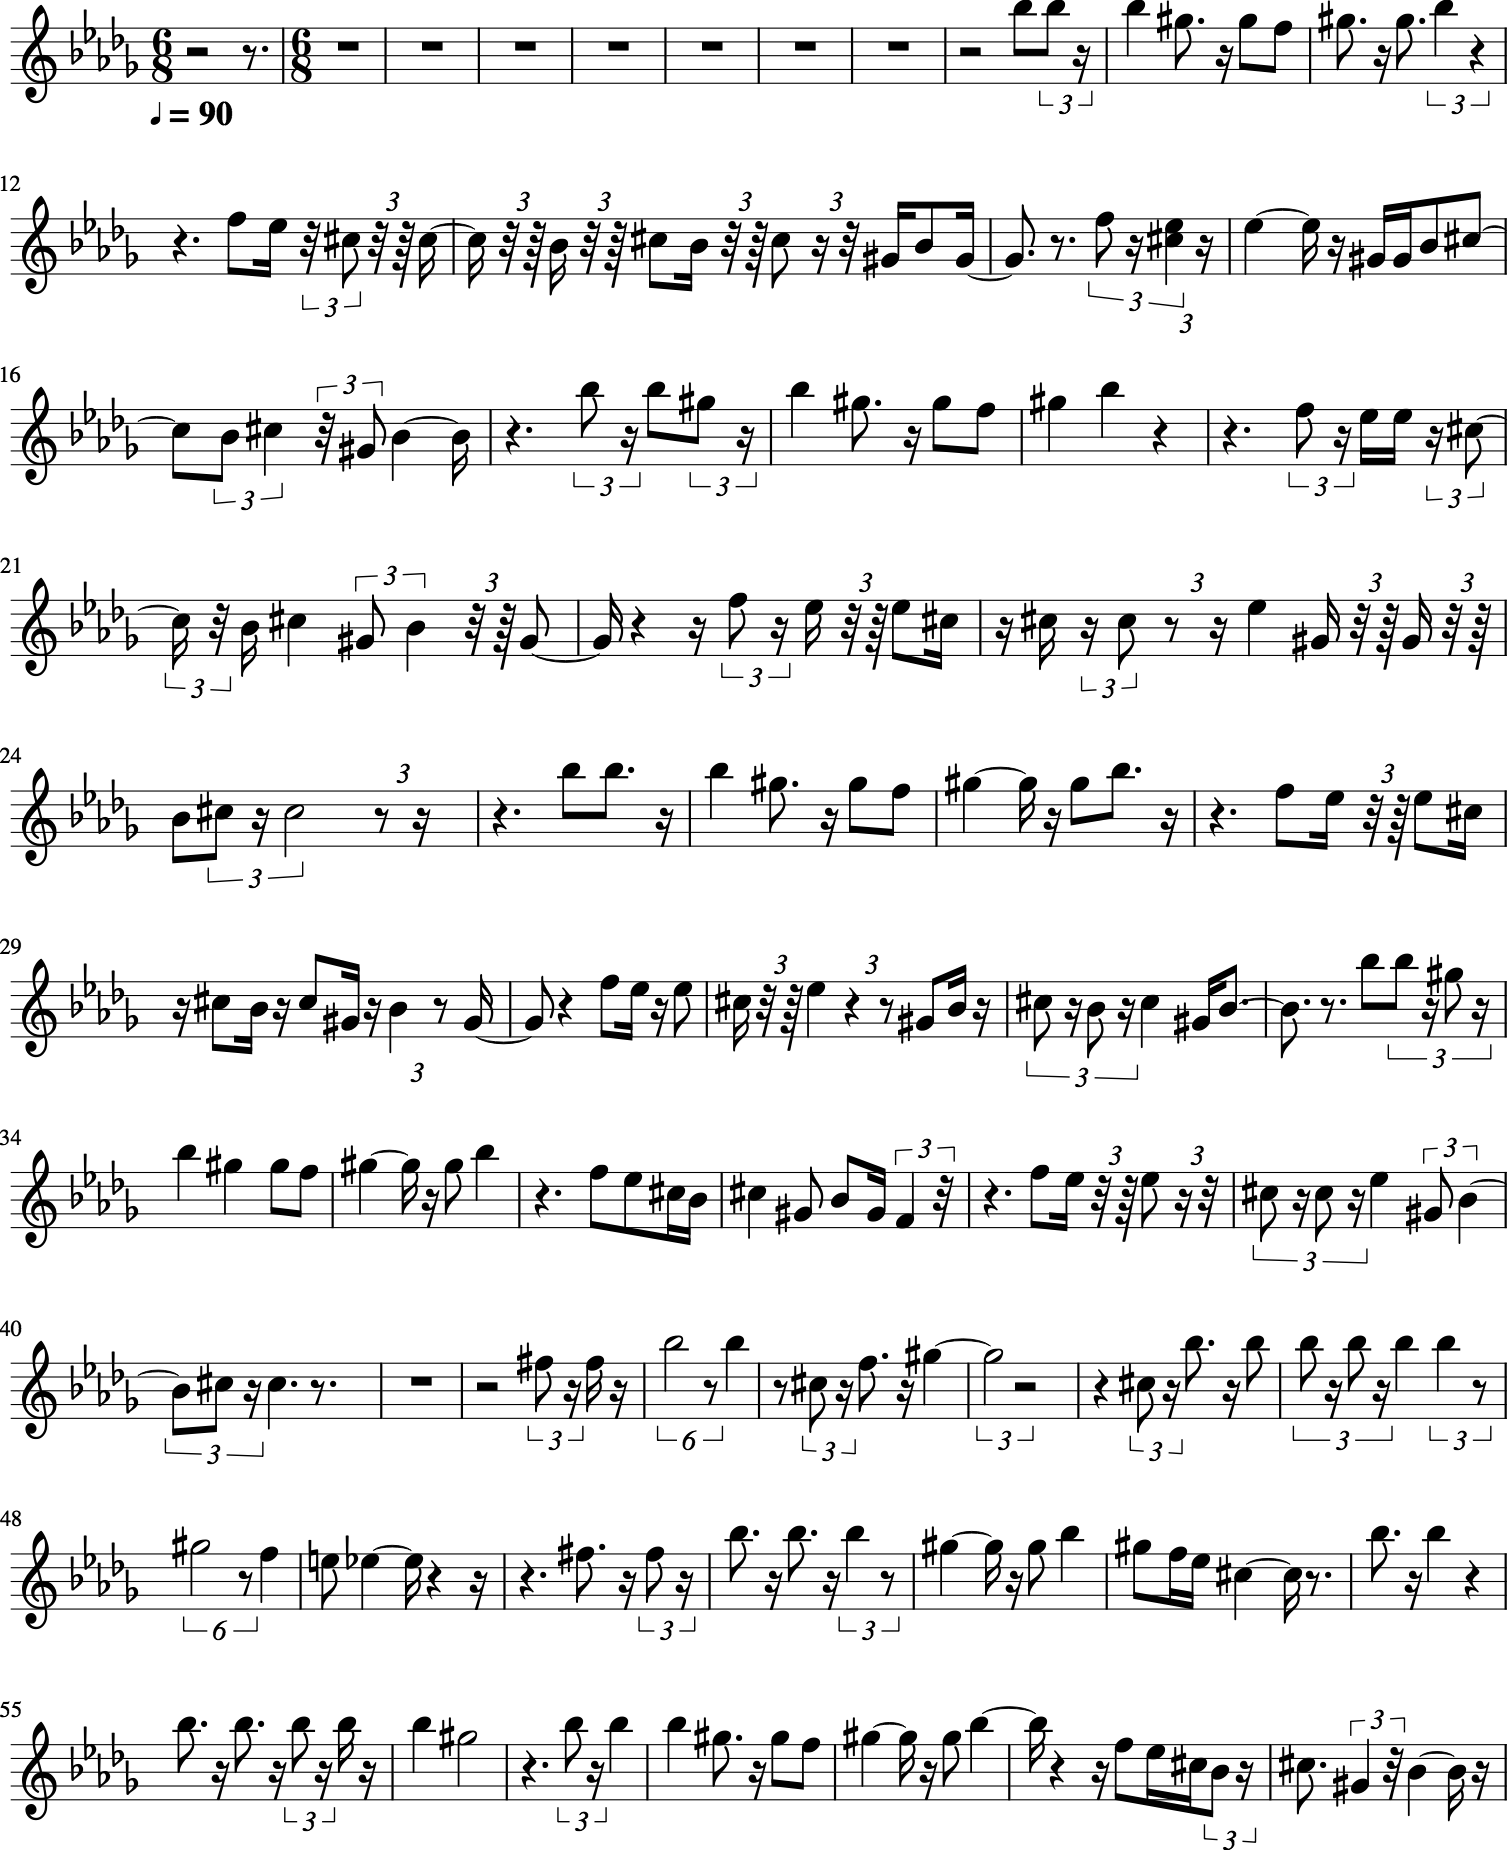

In [42]:
s1.show()

In [39]:
note.Rest().classes

('Rest', 'GeneralNote', 'Music21Object', 'ProtoM21Object', 'object')

In [ ]:
s1.get

In [47]:

    
for elem in s1.measures(1,12).recurse():
    if isinstance(elem, note.Note):
        print(elem.offset,elem.pitch,elem.duration.fullName)
    elif isinstance(elem, note.Rest):
        print(elem.offset,elem.duration.fullName,elem)
    else:
        print(elem.offset, elem,elem.classes[0])
    #print(elem.activeSite)

0.0 <music21.stream.Measure 1 offset=0.0> Measure
0.0  Instrument
0.0 Flute Flute
0.0 <music21.clef.TrebleClef> TrebleClef
0.0 <music21.tempo.MetronomeMark maestoso Quarter=90.0> MetronomeMark
0.0 D- major Key
0.0 <music21.meter.TimeSignature 6/8> TimeSignature
0.25 Imperfect Longa tied to Breve tied to Double Dotted Quarter (25 3/4 total QL) <music21.note.Rest rest>
3.0 <music21.stream.Measure 2 offset=3.0> Measure
0.0 <music21.meter.TimeSignature 6/8> TimeSignature
6.0 <music21.stream.Measure 3 offset=6.0> Measure
9.0 <music21.stream.Measure 4 offset=9.0> Measure
12.0 <music21.stream.Measure 5 offset=12.0> Measure
15.0 <music21.stream.Measure 6 offset=15.0> Measure
18.0 <music21.stream.Measure 7 offset=18.0> Measure
21.0 <music21.stream.Measure 8 offset=21.0> Measure
24.0 <music21.stream.Measure 9 offset=24.0> Measure
2.0 B-5 Eighth
2.5 B-5 Eighth Triplet (1/3 QL)
17/6 16th Triplet (1/6 QL) <music21.note.Rest rest>
27.0 <music21.stream.Measure 10 offset=27.0> Measure
0.0 B-5 Quarter


In [26]:
s1 = s.parts[0].makeMeasures()

In [21]:
s1.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Instrument ''>
    {0.0} <music21.instrument.Flute 'Flute'>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark maestoso Quarter=90.0>
    {0.0} <music21.key.Key of D- major>
    {0.0} <music21.meter.TimeSignature 6/8>
    {0.25} <music21.note.Rest rest>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.meter.TimeSignature 6/8>
{6.0} <music21.stream.Measure 3 offset=6.0>

{9.0} <music21.stream.Measure 4 offset=9.0>

{12.0} <music21.stream.Measure 5 offset=12.0>

{15.0} <music21.stream.Measure 6 offset=15.0>

{18.0} <music21.stream.Measure 7 offset=18.0>

{21.0} <music21.stream.Measure 8 offset=21.0>

{24.0} <music21.stream.Measure 9 offset=24.0>
    {2.0} <music21.note.Note B->
    {2.5} <music21.note.Note B->
    {2.8333} <music21.note.Rest rest>
{27.0} <music21.stream.Measure 10 offset=27.0>
    {0.0} <music21.note.Note B->
    {1.0} <music21.note.Note G#>
    {1.75} <music21

In [171]:
s.timeSignature

In [156]:
num_parts = len(s.parts)

In [170]:
s.parts[3]

'Electric Guitar'

In [166]:
help(stream.Part)

Help on class Part in module music21.stream:

class Part(Stream)
 |  A Stream subclass for designating music that is considered a single part.
 |  
 |  When put into a Score object, Part objects are all collected in the `Score.parts`
 |  call.  Otherwise they mostly work like generic Streams.
 |  
 |  Generally the hierarchy goes: Score > Part > Measure > Voice, but you are not
 |  required to stick to this.
 |  
 |  Part groupings (piano braces, etc.) are found in the :ref:`moduleLayout` module
 |  in the :class:`~music21.layout.StaffGroup` Spanner object.
 |  
 |  OMIT_FROM_DOCS
 |  Check that this is True and works for everything before suggesting that it works!
 |  
 |  May be enclosed in a staff (for instance, 2nd and 3rd trombone
 |  on a single staff), may enclose staves (piano treble and piano bass),
 |  or may not enclose or be enclosed by a staff (in which case, it
 |  assumes that this part fits on one staff and shares it with no other
 |  part
 |  
 |  Method resolution ord